KPI´S

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [2]:
df_accidents= pd.read_csv('Datasets\df_road_accidents.csv', encoding='utf-8')
cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", ['#00BFFF', '#000000'])

1.- KPI 1: Reduce by 10% the homicide rate in road accidents in the last six months, in CABA, compared to the homicide rate in road accidents in the previous semester.

In [3]:
df_accidents['Date'] = pd.to_datetime(df_accidents['Date'])
df_accidents['Year'] = df_accidents['Date'].dt.year
df_accidents['Semester'] = (df_accidents['Date'].dt.month - 1) // 6 + 1

total_population = 3120612
df_last_semester = df_accidents[(df_accidents['Year'] == df_accidents['Date'].dt.year.max()) & (df_accidents['Semester'] == 2)]
df_prev_semester = df_accidents[(df_accidents['Year'] == df_accidents['Date'].dt.year.max()) & (df_accidents['Semester'] == 1)]

homicide_rate_last_semester = len(df_last_semester[df_last_semester['Num victims'] > 0]) / total_population * 100000
homicide_rate_prev_semester = len(df_prev_semester[df_prev_semester['Num victims'] > 0]) / total_population * 100000

kpi1 = (homicide_rate_prev_semester - homicide_rate_last_semester) / homicide_rate_prev_semester * 100

In [4]:
kpi1

22.222222222222225

In [5]:
df_accidents['Date'] = pd.to_datetime(df_accidents['Date'])
df_accidents['Year'] = df_accidents['Date'].dt.year
df_accidents['Semester'] = (df_accidents['Date'].dt.month - 1) // 6 + 1
df_accidents['Num victims'] = 1

victims_per_semester = df_accidents.groupby(['Year', 'Semester'])['Num victims'].sum().reset_index()
victims_per_semester['Percentage Change'] = victims_per_semester['Num victims'].pct_change() * 100
victims_per_semester['Year'] = victims_per_semester['Year'].astype(int)
victims_per_semester['Semester'] = victims_per_semester['Semester'].astype(int)
victims_per_semester['Trend'] = victims_per_semester['Percentage Change'].apply(lambda x: 'Increase' if x > 0 else ('Decrease' if x < 0 else 'No Change'))
victims_per_semester.tail(3)

,Year,Semester,Num victims,Percentage Change,Trend
9,2020,2,49,63.333333,Increase
10,2021,1,54,10.204082,Increase
11,2021,2,42,-22.222222,Decrease


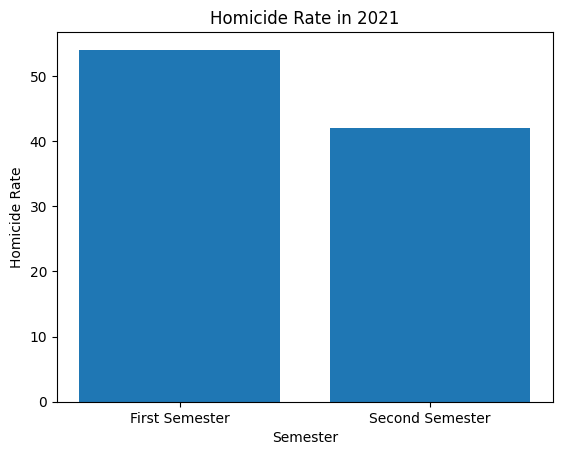

The percentage difference between the first and second semester is 22.22%


In [6]:
homicide_rate_first_semester = 54 
homicide_rate_second_semester = 42

percentage_difference = (homicide_rate_first_semester - homicide_rate_second_semester) / homicide_rate_first_semester * 100
semesters = ['First Semester ´21', 'Second Semester ´21']

rates = [homicide_rate_first_semester, homicide_rate_second_semester]

plt.bar(semesters, rates)
plt.title('Homicide Rate in 2021')
plt.xlabel('Semester')
plt.ylabel('Homicide Rate')

plt.show()
print(f'The percentage difference between the first and second semester is {percentage_difference:.2f}%')

The KPI1 value of 22.222222222222225% means that the homicide rate in road accidents in the last six months in CABA has decreased compared to the homicide rate in road accidents in the previous semester.

This is a significant reduction and indicates that measures taken to improve road safety may be effective. However, it’s important to consider other factors that could have contributed to this decrease. For example, there could have been fewer vehicles on the road due to lockdowns or other restrictions, or there could have been changes in reporting or data collection methods.

It’s also worth noting that while a reduction in the homicide rate is a positive outcome, any loss of life is tragic. Therefore, continued efforts should be made to improve road safety and aim for a further reduction in the homicide rate in road accidents.



2.- KPI 2: Reduce by 7% the number of fatal motorcyclist accidents in the last year, in CABA, compared to the previous year.

In [7]:
df_accidents['date'] = pd.to_datetime(df_accidents['Date'])
df_motos = df_accidents[df_accidents['Victim'] == 'MOTO']

victims_per_year = df_motos.groupby(df_motos['Date'].dt.year).size().reset_index(name='FATAL_VICTIMS')
total_population = 3120612

victims_per_year['RATE'] = (victims_per_year['FATAL_VICTIMS'] / total_population) * 100000
victims_per_year['DIFFERENCE'] = (victims_per_year['RATE'] / victims_per_year['RATE'].shift(1) - 1) * 100

print(victims_per_year.tail(3))

   Date  FATAL_VICTIMS      RATE  DIFFERENCE
3  2019             50  1.602250  -12.280702
4  2020             27  0.865215  -46.000000
5  2021             45  1.442025   66.666667


Percentage Change in Road Accidents Per Year:

C:\Users\m_evi\AppData\Local\Temp\ipykernel_86560\1858060858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_motos['Date'] = pd.to_datetime(df_motos['Date'])
C:\Users\m_evi\AppData\Local\Temp\ipykernel_86560\1858060858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_motos['Year'] = df_motos['Date'].dt.year


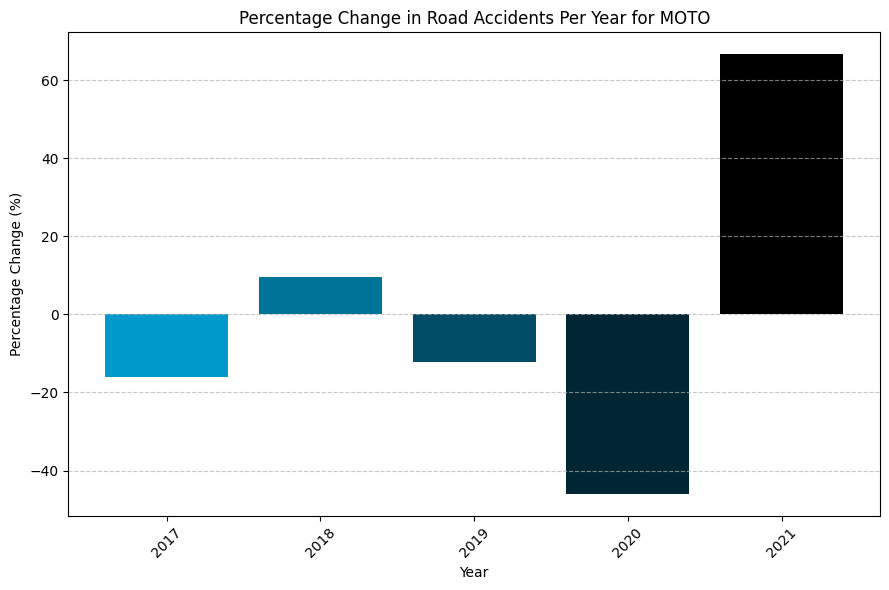

In [8]:
df_motos['Date'] = pd.to_datetime(df_motos['Date'])
df_motos['Year'] = df_motos['Date'].dt.year

accidents_per_year_moto = df_motos.groupby('Year')['Num victims'].sum().reset_index()
accidents_per_year_moto['Percentage Change'] = accidents_per_year_moto['Num victims'].pct_change() * 100
colors = cmap(np.linspace(0, 1, len(accidents_per_year_moto)))

plt.figure(figsize=(9, 6))
plt.bar(accidents_per_year_moto['Year'].astype(str), accidents_per_year_moto['Percentage Change'], color=colors)
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.title('Percentage Change in Road Accidents Per Year for MOTO')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


The KPI2 value is 66.67%, this means that the number of fatal accidents involving motorcyclists in the last year in CABA has increased by approximately 66.67% compared to the previous year.

This is a significant increase and suggests that the road safety situation, particularly for motorcyclists, has worsened. It’s important to investigate the factors that could have contributed to this increase. For example, there could have been an increase in the number of motorcyclists on the road as restrictions eased, changes in traffic patterns, or changes in reporting or data collection methods.

While an increase in fatal accidents involving motorcyclists is a concerning outcome, it highlights the need for urgent action. Efforts should be made to improve road safety for motorcyclists and aim for a reduction in fatal accidents.

The goal was to reduce the number of fatal accidents involving motorcyclists by 7% in the last year in CABA compared to the previous year. This target was set to improve road safety, particularly for motorcyclists, who are often at higher risk of fatal accidents.

However, the data shows an increase of approximately 66.67% in the number of fatal accidents involving motorcyclists compared to the previous year. This is significantly off the target and indicates that the situation has worsened rather than improved.

This discrepancy between the target and the actual outcome highlights the urgent need for interventions to improve road safety for motorcyclists. It’s important to investigate the factors contributing to this increase and to implement measures to address them.

Moreover, it’s crucial to continuously monitor these KPIs and adjust the strategies as necessary to achieve the safety objectives. This could involve implementing new safety measures, enhancing existing ones, or conducting further research to understand the underlying causes of the increase in accidents. 

It’s also important to consider the limitations of these KPIs. They provide a snapshot of the situation based on the available data, but they may not capture all relevant factors or nuances. For a more comprehensive understanding, these KPIs could be complemented with additional data and analysis, such as demographic information about the victims, specific locations of the accidents, time of the accidents, and more.

The COVID-19 pandemic and the associated lockdowns and restrictions have had a significant impact on many aspects of life, including road traffic. In 2020 and 2021, many cities around the world, including CABA, implemented lockdowns and travel restrictions. As the city reopens and traffic levels return to normal, it will be important to monitor these KPIs to see if the trend continues. If the number of fatal accidents continues to increase, it may indicate that the increase was not solely due to the temporary changes in traffic during the lockdown, but could also be due to other factors.

In conclusion, while the KPIs suggest a concerning trend in road safety in CABA after the pandemic, continuous monitoring and analysis are necessary to understand the true impact and to identify areas where further interventions are needed.


3.-KPI3 reduce by 10% the number of victims who die on AVENUES in the last year, taking into account the previous one.

In [10]:
df_accidents['Date'] = pd.to_datetime(df_accidents['Date'])
df_2020 = df_accidents[(df_accidents['Date'].dt.year == 2020) & (df_accidents['Street Tipe'] == 'AVENIDA')]
df_2021 = df_accidents[(df_accidents['Date'].dt.year == 2021) & (df_accidents['Street Tipe'] == 'AVENIDA')]

victimas_2020 = df_2020['Num victims'].sum()
victimas_2021 = df_2021['Num victims'].sum()

reduccion_esperada = victimas_2020 * 0.9



In [14]:
reduccion_real = (victimas_2020 - victimas_2021) / victimas_2020 * 100

diferencia = 10 - reduccion_real

print(f"The actual reduction was {reduccion_real:.2f}%.")
print(f"The difference with respect to the expected 10% reduction is {diferencia:.2f}%.")

The actual reduction was -17.31%.
The difference with respect to the expected 10% reduction is 27.31%.


In [13]:
if victimas_2021 <= reduccion_esperada:
    print("Objective reached")
else:
    print("Target not achieved")

Target not achieved


In [20]:
# Primero, asegúrate de que la columna 'Date' sea de tipo datetime
df_accidents['Date'] = pd.to_datetime(df_accidents['Date'])

# Filtra los datos para las víctimas en avenidas en 2020 y 2021
df_2020 = df_accidents[(df_accidents['Date'].dt.year == 2020) & (df_accidents['Street Tipe'] == 'AVENIDA')]
df_2021 = df_accidents[(df_accidents['Date'].dt.year == 2021) & (df_accidents['Street Tipe'] == 'AVENIDA')]

# Calcula el número total de víctimas para cada año
victimas_2020 = df_2020['Num victims'].sum()
victimas_2021 = df_2021['Num victims'].sum()

# Calcula la reducción real
KPI3ReduccionReal = (victimas_2020 - victimas_2021) / victimas_2020 * 100

print(f"The actual reduction was {KPI3ReduccionReal:.2f}%.")

The actual reduction was -17.31%.


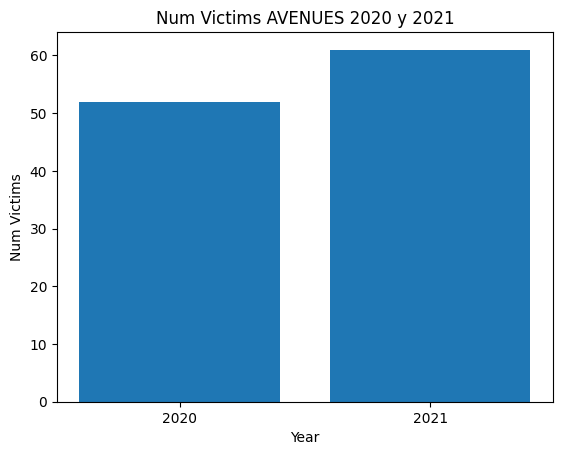

Victims Avenues 2020: 52.
Victims Avenues 2021: 61.


In [24]:
import matplotlib.pyplot as plt

# Filtra los datos para las víctimas en avenidas en 2020 y 2021
df_2020 = df_accidents[(df_accidents['Date'].dt.year == 2020) & (df_accidents['Street Tipe'] == 'AVENIDA')]
df_2021 = df_accidents[(df_accidents['Date'].dt.year == 2021) & (df_accidents['Street Tipe'] == 'AVENIDA')]

# Calcula el número total de víctimas para cada año
victims_2020 = df_2020['Num victims'].sum()
victims_2021 = df_2021['Num victims'].sum()

# Crea un gráfico de barras
plt.bar(['2020', '2021'], [victimas_2020, victims_2021])
plt.xlabel('Year')
plt.ylabel('Num Victims')
plt.title('Num Victims AVENUES 2020 y 2021')
plt.show()
print(f"Victims Avenues 2020: {victims_2020}.")
print(f"Victims Avenues 2021: {victims_2021}.")

The KPI3 was set with the objective of reducing the number of victims who die on avenues by 10% compared to the previous year. However, the results show that there was actually an increase of 17.31% in the number of victims in 2021 compared to 2020. This means that not only was the expected reduction not achieved, but the situation actually worsened.

The difference with respect to the expected reduction of 10% is 27.31%. This means we are 27.31% below the victim reduction target that had been set.

These results suggest that the measures implemented to reduce the number of victims on avenues in 2021 were not effective. It may be useful to review these measures and consider new strategies to improve safety on avenues and reduce the number of victims.

From a data analyst’s perspective, it’s crucial to understand the factors that contributed to this increase. It could be due to a variety of reasons such as changes in traffic volume, changes in traffic rules, or even external factors such as weather conditions